# Loan Prediction Classifier

The dataset has been taken from analyticVidya competition, where we have to predict 'Loan grant', through classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
df =pd.read_csv("/home/preeti/Desktop/train_ctrUa4K.csv")
test_df =pd.read_csv("/home/preeti/Desktop/test_lAUu6dG.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
print (total)
# df.apply(lambda x: sum(x.isnull()),axis=0) 

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64


In [5]:
test_df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
percentage = df.isnull().sum()/df.isnull().count()*100
percentage2 = round(percentage,1).sort_values(ascending=False)
total.head(3)

missingData = pd.concat([total,percentage2],axis =1, keys =['Total','Percentage'])
missingData.head(7)

,Total,Percentage
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


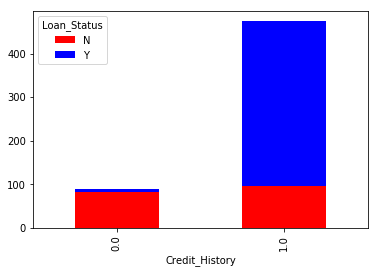

In [8]:
visual1 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
visual1 .plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

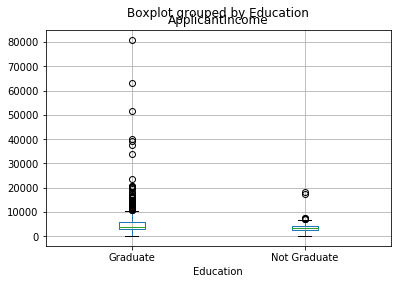

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We see that there is not much signiificant difference between the mean income of graduate and non-graduates. But higher number of graduates are there with very high incomes, which are shown as outliers.

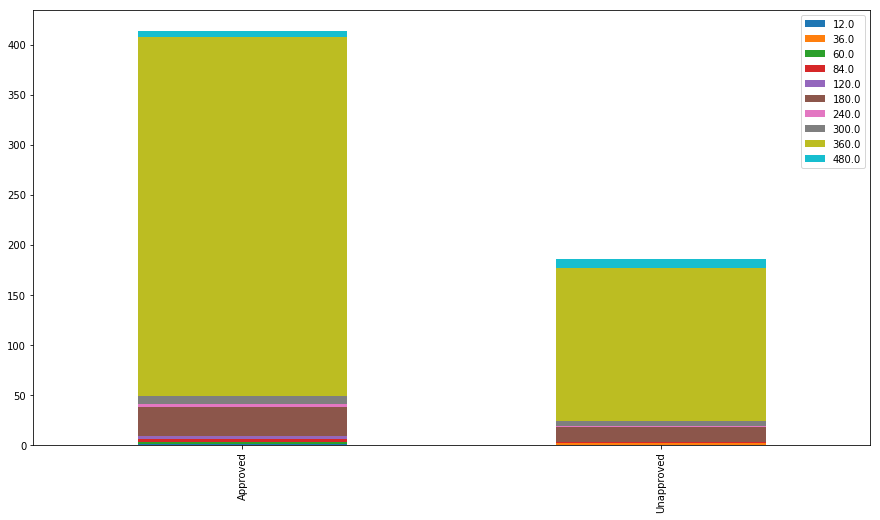

In [10]:
approved_term = df[df['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = df[df['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df1 = pd.DataFrame([approved_term,unapproved_term])
df1.index = ['Approved','Unapproved']
df1.plot(kind='bar', stacked=True, figsize=(15,8))

In [11]:
combine =[df, test_df]

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df.groupby(['Gender','Married'])['Loan_Status'].value_counts(normalize=True)

Gender  Married  Loan_Status
Female  No       Y              0.637500
                 N              0.362500
        Yes      Y              0.741935
                 N              0.258065
Male    No       Y              0.623077
                 N              0.376923
        Yes      Y              0.717087
                 N              0.282913
Name: Loan_Status, dtype: float64

In [14]:
df['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
freq_port = df.Dependents.dropna().mode()[0]
for dataset in combine:
    dataset['Gender'].fillna('Female',inplace = True)
    dataset['Gender'].replace(to_replace=['Male','Female'], value=[1,0],inplace=True)
    dataset['Self_Employed'].fillna('No',inplace = True)
    dataset['Self_Employed'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
    
    dataset['Property_Area'].replace(to_replace=['Urban','Rural','Semiurban'], value=[2,1,0],inplace=True)
    dataset['Married'].fillna('Yes',inplace = True)
    dataset['Married'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
    dataset['Education'].replace(to_replace=['Graduate','Not Graduate'], value=[1,0],inplace=True)
    dataset['Dependents'].fillna(freq_port,inplace = True)
    dataset['Dependents'] = dataset['Dependents'].str.rstrip('+')



df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,0,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,0,N


In [17]:
x = df['LoanAmount'].mode()[0]
y = df['Loan_Amount_Term'].mode()[0]
df['LoanAmount'].fillna(x, inplace=True)
df['Loan_Amount_Term'].fillna(y, inplace=True)
test_df['LoanAmount'].fillna(x, inplace=True)
test_df['Loan_Amount_Term'].fillna(y, inplace=True)

In [18]:
df['Loan_Status'].replace(to_replace=['Y','N'], value=[0,1],inplace=True)

In [19]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
median = round(df['Credit_History'].median())
for dataset in combine :
    dataset['Credit_History'].fillna(median, inplace =True)
    dataset['TotalAmount']=dataset['ApplicantIncome']+ dataset['CoapplicantIncome']
    
df.apply(lambda x: sum(x.isnull()),axis=0), test_df.apply(lambda x: sum(x.isnull()),axis=0)
df= df.drop(['ApplicantIncome','CoapplicantIncome'],axis =1)
test_df = test_df.drop(['ApplicantIncome','CoapplicantIncome'],axis =1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalAmount
0,LP001002,1,0,0,1,0,120.0,360.0,1.0,2,0,5849.0
1,LP001003,1,1,1,1,0,128.0,360.0,1.0,1,1,6091.0
2,LP001005,1,1,0,1,1,66.0,360.0,1.0,2,0,3000.0
3,LP001006,1,1,0,0,0,120.0,360.0,1.0,2,0,4941.0
4,LP001008,1,0,0,1,0,141.0,360.0,1.0,2,0,6000.0


In [22]:
def feature_scaling(df):
    df -= df.min()
    df /= df.max()
    return df
    
df['TotalAmount'] = feature_scaling(df['TotalAmount'])
test_df['TotalAmount'] = feature_scaling(test_df['TotalAmount'])
df['LoanAmount'] = feature_scaling(df['LoanAmount'])
test_df['LoanAmount'] = feature_scaling(test_df['LoanAmount'])
df['Loan_Amount_Term'] = feature_scaling(df['Loan_Amount_Term'])
test_df['Loan_Amount_Term'] = feature_scaling(test_df['Loan_Amount_Term'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalAmount
0,LP001002,1,0,0,1,0,0.160637,0.74359,1.0,2,0,0.055394
1,LP001003,1,1,1,1,0,0.172214,0.74359,1.0,1,1,0.058435
2,LP001005,1,1,0,1,1,0.082489,0.74359,1.0,2,0,0.019583
3,LP001006,1,1,0,0,0,0.160637,0.74359,1.0,2,0,0.043980
4,LP001008,1,0,0,1,0,0.191027,0.74359,1.0,2,0,0.057292


In [23]:
df.apply(lambda x: sum(x.isnull()),axis=0), test_df.apply(lambda x: sum(x.isnull()),axis=0)

(Loan_ID             0
 Gender              0
 Married             0
 Dependents          0
 Education           0
 Self_Employed       0
 LoanAmount          0
 Loan_Amount_Term    0
 Credit_History      0
 Property_Area       0
 Loan_Status         0
 TotalAmount         0
 dtype: int64, Loan_ID             0
 Gender              0
 Married             0
 Dependents          0
 Education           0
 Self_Employed       0
 LoanAmount          0
 Loan_Amount_Term    0
 Credit_History      0
 Property_Area       0
 TotalAmount         0
 dtype: int64)

In [24]:
df = df.drop(['Loan_ID'],axis=1)
test_df =test_df.drop(['Loan_ID'],axis=1)
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalAmount
0,1,1,0,1,0,0.157088,0.746835,1.0,2,0.055957
1,1,1,1,1,0,0.187739,0.746835,1.0,2,0.039791
2,1,1,2,1,0,0.344828,0.746835,1.0,2,0.071218
3,1,1,2,1,0,0.137931,0.746835,1.0,2,0.044172
4,1,0,0,0,0,0.095785,0.746835,1.0,2,0.021422


Model and Predict

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [26]:
X =df.drop('Loan_Status',axis =1)
Y =df['Loan_Status']
X_test  = test_df.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33, random_state = 5)

In [27]:

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((411, 10), (411,), (203, 10), (203,))

In [28]:
test_df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalAmount
0,1,1,0,1,0,0.157088,0.746835,1.0,2,0.055957
1,1,1,1,1,0,0.187739,0.746835,1.0,2,0.039791
2,1,1,2,1,0,0.344828,0.746835,1.0,2,0.071218
3,1,1,2,1,0,0.137931,0.746835,1.0,2,0.044172
4,1,0,0,0,0,0.095785,0.746835,1.0,2,0.021422
5,1,1,0,0,1,0.237548,0.746835,1.0,2,0.054077
6,0,0,1,0,0,0.059387,0.746835,1.0,0,0.006585
7,1,1,2,0,0,0.227969,0.746835,0.0,1,0.029971
8,1,1,2,1,0,0.482759,0.493671,1.0,2,0.167771
9,1,0,0,0,0,0.181992,0.746835,1.0,0,0.042957


In [29]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(test_df)
predictions = LR.predict(X_test)
train_acc_LR =round(LR.score(X_train,Y_train)* 100, 7)
test_acc_LR = round(LR.score(X_test,Y_test)* 100, 7)
cm_LR = confusion_matrix(Y_test,predictions)
acc_LR = accuracy_score(Y_test,predictions)
train_acc_LR, test_acc_LR, acc_LR,  cm_LR

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(79.5620438, 83.7438424, 0.8374384236453202, array([[144,   4],
        [ 29,  26]]))

In [30]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(test_df)
predictions = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
train_acc_RF =round(random_forest.score(X_train,Y_train)* 100, 7)
test_acc_RF = round(random_forest.score(X_test,Y_test)* 100, 7)
cm_RF = confusion_matrix(Y_test,predictions)
acc_RF = accuracy_score(Y_test,predictions)
train_acc_RF, test_acc_RF, acc_RF,  cm_RF

(100.0, 80.2955665, 0.8029556650246306, array([[135,  13],
        [ 27,  28]]))

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
clf = RandomForestClassifier() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
clf_RF_mean = np.mean(cross_val_score(clf, X_train, Y_train, cv=10))
print (clf_RF_mean)

/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

0.7788501742160279


/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
clf =LogisticRegression()
clf_LR_mean = np.mean(cross_val_score(clf, X_train, Y_train, cv=10))
print (clf_LR_mean)

0.7934930313588849


/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/preeti/datascience/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

Creating a table with models and respective scores:

In [34]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [acc_LR, acc_RF],
    'Training Accuracy': [train_acc_LR,train_acc_RF],
    'Test Accuracy': [test_acc_LR,test_acc_RF ],
    'Cross Val Score': [clf_LR_mean, clf_RF_mean]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Training Accuracy,Test Accuracy,Cross Val Score
0,Logistic Regression,0.837438,79.562044,83.743842,0.793493
1,Random Forest,0.802956,100.000000,80.295567,0.778850


We will use the following code to predict Loan_Status for test dataset and save the output into a csv file.

output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)